In [1]:
!pip install ipykernel 

In [2]:
!pip install pymysql

In [3]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pymysql

In [5]:
db=pymysql.connect(host='localhost',user='root',password='Barathbala123',database='hello')
mycursor=db.cursor()

In [6]:
db=pymysql.connect(host='localhost',user='root',password='Barathbala123',database='hr')
mycursor=db.cursor()

In [7]:
mycursor.execute("select * from countries")

25

In [8]:
mycursor.fetchall()

(('AR', 'Argentina', 2),
 ('AU', 'Australia', 3),
 ('BE', 'Belgium', 1),
 ('BR', 'Brazil', 2),
 ('CA', 'Canada', 2),
 ('CH', 'Switzerland', 1),
 ('CN', 'China', 3),
 ('DE', 'Germany', 1),
 ('DK', 'Denmark', 1),
 ('EG', 'Egypt', 4),
 ('FR', 'France', 1),
 ('HK', 'HongKong', 3),
 ('IL', 'Israel', 4),
 ('IN', 'India', 3),
 ('IT', 'Italy', 1),
 ('JP', 'Japan', 3),
 ('KW', 'Kuwait', 4),
 ('MX', 'Mexico', 2),
 ('NG', 'Nigeria', 4),
 ('NL', 'Netherlands', 1),
 ('SG', 'Singapore', 3),
 ('UK', 'United Kingdom', 1),
 ('US', 'United States of America', 2),
 ('ZM', 'Zambia', 4),
 ('ZW', 'Zimbabwe', 4))

In [9]:
import pandas as pd
country=pd.read_sql_query("select * from countries",db)
country

C:\Users\Barath Bala\AppData\Local\Temp\ipykernel_9000\1689495824.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  country=pd.read_sql_query("select * from countries",db)


,country_id,country_name,region_id
0,AR,Argentina,2
1,AU,Australia,3
2,BE,Belgium,1
3,BR,Brazil,2
4,CA,Canada,2
5,CH,Switzerland,1
6,CN,China,3
7,DE,Germany,1
8,DK,Denmark,1
9,EG,Egypt,4


In [10]:
regions=pd.read_sql_query("select * from regions",db)
regions

C:\Users\Barath Bala\AppData\Local\Temp\ipykernel_9000\399184318.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  regions=pd.read_sql_query("select * from regions",db)


,region_id,region_name
0,1,Europe
1,2,Americas
2,3,Asia
3,4,Middle East and Africa


In [11]:
# TASK 1
mycursor.execute("""select C.country_name,R.region_id from countries AS C
inner join regions AS R
ON C.region_id= R.region_id
group by C.country_name,R.region_id""")

25

In [12]:
for  i in mycursor:
    print(i)

('Belgium', 1)
('Switzerland', 1)
('Germany', 1)
('Denmark', 1)
('France', 1)
('Italy', 1)
('Netherlands', 1)
('United Kingdom', 1)
('Argentina', 2)
('Brazil', 2)
('Canada', 2)
('Mexico', 2)
('United States of America', 2)
('Australia', 3)
('China', 3)
('HongKong', 3)
('India', 3)
('Japan', 3)
('Singapore', 3)
('Egypt', 4)
('Israel', 4)
('Kuwait', 4)
('Nigeria', 4)
('Zambia', 4)
('Zimbabwe', 4)


In [13]:
employee_counts=pd.read_sql_query("select * from employees",db)
employee_counts

C:\Users\Barath Bala\AppData\Local\Temp\ipykernel_9000\1616817887.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employee_counts=pd.read_sql_query("select * from employees",db)


,employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,commission_pct,manager_id,department_id
0,100,Steven,King,SKING,515.123.4567,1987-06-17,AD_PRES,24000.0,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,1989-09-21,AD_VP,17000.0,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,1993-01-13,AD_VP,17000.0,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,1990-01-03,IT_PROG,9000.0,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,1991-05-21,IT_PROG,6000.0,NaN,103.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...
102,202,Pat,Fay,PFAY,603.123.6666,1997-08-17,MK_REP,6000.0,NaN,201.0,20.0
103,203,Susan,Mavris,SMAVRIS,515.123.7777,1994-06-07,HR_REP,6500.0,NaN,101.0,40.0
104,204,Hermann,Baer,HBAER,515.123.8888,1994-06-07,PR_REP,10000.0,NaN,101.0,70.0
105,205,Shelley,Higgins,SHIGGINS,515.123.8080,1994-06-07,AC_MGR,12000.0,NaN,101.0,110.0


In [14]:
countries_counts=pd.read_sql_query("select  * from countries",db)
countries_counts

C:\Users\Barath Bala\AppData\Local\Temp\ipykernel_9000\384915557.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  countries_counts=pd.read_sql_query("select  * from countries",db)


,country_id,country_name,region_id
0,AR,Argentina,2
1,AU,Australia,3
2,BE,Belgium,1
3,BR,Brazil,2
4,CA,Canada,2
5,CH,Switzerland,1
6,CN,China,3
7,DE,Germany,1
8,DK,Denmark,1
9,EG,Egypt,4


In [15]:
region=pd.read_sql_query("select * from regions",db)
region

C:\Users\Barath Bala\AppData\Local\Temp\ipykernel_9000\3795763680.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  region=pd.read_sql_query("select * from regions",db)


,region_id,region_name
0,1,Europe
1,2,Americas
2,3,Asia
3,4,Middle East and Africa


In [16]:
department=pd.read_sql_query("select *from departments",db)
department

C:\Users\Barath Bala\AppData\Local\Temp\ipykernel_9000\3399514428.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  department=pd.read_sql_query("select *from departments",db)


,department_id,department_name,manager_id,location_id
0,10,Administration,200.0,1700
1,20,Marketing,201.0,1800
2,30,Purchasing,114.0,1700
3,40,Human Resources,203.0,2400
4,50,Shipping,121.0,1500
5,60,IT,103.0,1400
6,70,Public Relations,204.0,2700
7,80,Sales,145.0,2500
8,90,Executive,100.0,1700
9,100,Finance,108.0,1700


In [17]:
regions=pd.read_sql_query("select * from regions",db)
regions

C:\Users\Barath Bala\AppData\Local\Temp\ipykernel_9000\399184318.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  regions=pd.read_sql_query("select * from regions",db)


,region_id,region_name
0,1,Europe
1,2,Americas
2,3,Asia
3,4,Middle East and Africa


In [18]:
# TASK 2
COUNTRY_COUNT=("""select count(E.employee_id),C.country_name
from  employees AS E
JOIN departments AS D
JOIN locations AS L
JOIN countries AS C
ON E.department_id=D.department_id
AND D.location_id=L.location_id 
AND L.country_id=C.country_id
group by C.country_name
order by count(E.employee_id) desc;""")
mycursor.execute(COUNTRY_COUNT)

4

In [19]:
COUNT_COUNTRY=pd.read_sql_query("""select count(E.employee_id),C.country_name
from  employees AS E
JOIN departments AS D
JOIN locations AS L
JOIN countries AS C
ON E.department_id=D.department_id
AND D.location_id=L.location_id 
AND L.country_id=C.country_id
group by C.country_name
order by count(E.employee_id) desc;""",db)
COUNT_COUNTRY

C:\Users\Barath Bala\AppData\Local\Temp\ipykernel_9000\2039499485.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  COUNT_COUNTRY=pd.read_sql_query("""select count(E.employee_id),C.country_name


,count(E.employee_id),country_name
0,68,United States of America
1,35,United Kingdom
2,2,Canada
3,1,Germany


In [20]:
import pandas as pd
from sqlalchemy import create_engine

In [21]:
hostname="localhost"
dbname="hr"
uname="root"
pwd="Barathbala123"
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host=hostname, db=dbname, user=uname, pw=pwd))

In [22]:
COUNT_COUNTRY.to_csv("DS39_S6_FILE COUNTRY WISE EMPLOYEE_COUNT",index=False)

In [23]:
# TASK 3
country_count=("""select count(E.employee_id),C.country_name
from  employees AS E
JOIN departments AS D
JOIN locations AS L
JOIN countries AS C
ON E.department_id=D.department_id
AND D.location_id=L.location_id 
AND L.country_id=C.country_id
group by C.country_name
order by count(E.employee_id) desc;""")

In [24]:
c_count=pd.read_sql_query("""select count(E.employee_id),C.country_name
from  employees AS E
JOIN departments AS D
JOIN locations AS L
JOIN countries AS C
ON E.department_id=D.department_id
AND D.location_id=L.location_id 
AND L.country_id=C.country_id
group by C.country_name
order by count(E.employee_id) desc;""",db)
c_count

C:\Users\Barath Bala\AppData\Local\Temp\ipykernel_9000\2885610081.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  c_count=pd.read_sql_query("""select count(E.employee_id),C.country_name


,count(E.employee_id),country_name
0,68,United States of America
1,35,United Kingdom
2,2,Canada
3,1,Germany


In [25]:
c_count.to_csv('country_wise_count',index=False)

<BarContainer object of 4 artists>

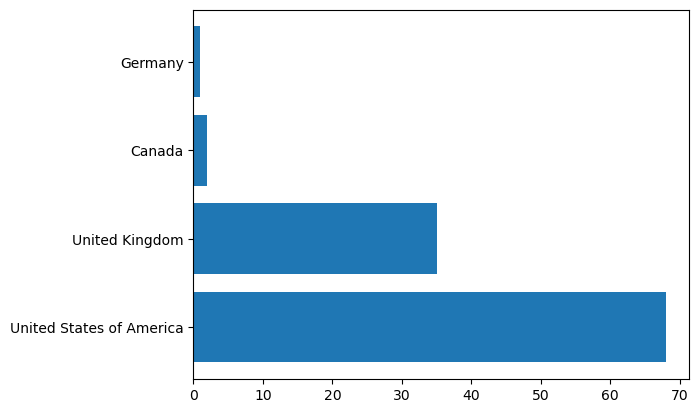

In [26]:
import matplotlib.pyplot as plt
plt.barh(c_count["country_name"],c_count["count(E.employee_id)"])

In [27]:
for i in mycursor:
    print(i)

(68, 'United States of America')
(35, 'United Kingdom')
(2, 'Canada')
(1, 'Germany')


In [28]:
city=("""select count(E.employee_id),L.city
from employees AS E
JOIN departments AS D
JOIN locations AS L
ON E.department_id=D.department_id
AND D.location_id=L.location_id
group by L.city
order by count(E.employee_id)desc""")

In [29]:
count_city=pd.read_sql_query("""select count(E.employee_id),L.city
from employees AS E
JOIN departments AS D
JOIN locations AS L
ON E.department_id=D.department_id
AND D.location_id=L.location_id
group by L.city
order by count(E.employee_id)desc""",db)
count_city

C:\Users\Barath Bala\AppData\Local\Temp\ipykernel_9000\3432400523.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  count_city=pd.read_sql_query("""select count(E.employee_id),L.city


,count(E.employee_id),city
0,45,South San Francisco
1,34,Oxford
2,18,Seattle
3,5,Southlake
4,2,Toronto
5,1,London
6,1,Munich


<BarContainer object of 7 artists>

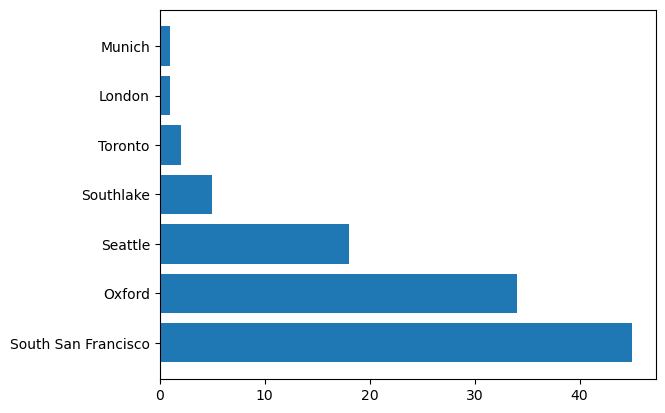

In [30]:
count_city.to_csv("city_wise_count",index=False)
plt.barh(count_city['city'],count_city["count(E.employee_id)"])